## 네이버 이미지 크롤링
- selenium을 이용해 이미 크롤링
- 폴더 생성/기본폴더, 파일명에 따른 다른 이름 저장

In [2]:
# 필요한 모듈(라이브러리 연렬)
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from urllib import request    # 이미지 다운로드에 사용
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
import time
import os

#### 준비
1. 크롬 드라이브 실행
2. 검색어를 이용한 url 생성
3. 화면 스크롤 이동을 통한 추가 이미지 생성

In [3]:
browser = Chrome('./chromedriver')
time.sleep(1)

# 키워드 입력 및 url 생성
keyword=input("이미지 검색어 입력: ")

url="https://search.naver.com/search.naver?where=image&sm=tab_jum&query="
url += keyword  # url = url + keyword

# url을 이용한 페이지 이동
browser.get(url)

#스크로 이동 횟수 정의
count_down=int(input("스크롤 다운 횟수 입력(최대:6):"))

# 사용자가 요구한 스크롤 다운 횟수 확인(최대 6회)
if count_down > 6:
    count_down = 6


# windows.scrollTo(0, Height) : 스크롤을 아래쪽으로 이동
# Height 대신 document.body.scrollHeight를 입력하면 페이지 끝으로 이동

for i in range(count_down):
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight)")
    time.sleep(1)

이미지 검색어 입력: 게임
스크롤 다운 횟수 입력(최대:6):6


#### 화면에서 이미지 추출하기
1. 드라이브의 소스코드 받아오기
2. 이미지가 있는 태그 찾기
3. 태그에서 이미지 소스("src") 받아오기
4. src 주소를 이용해 이미지 다운로드 하기

In [4]:
# 드라이브 소스코드 가져오기
html = browser.page_source
soup = bs(html, "html.parser")

#### Image lazy loading
- 현재 화면에 필요한 이미지만 불러오는 기능
- 구글에서 검색해 보세요

In [5]:
# 이미지 대표 태그 찾아 tag_img 변수에 저장(tag_img => 리스트형 데이터)
tag_img = soup.find_all("div", class_="thumb")

img=tag_img[4].find("img", class_="_image _listImage")

if img.get("data-lazy-src") == None:
    print(img["src"])
else:
    print(img.get("data-lazy-src"))

https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMjA0MDhfMTEx%2FMDAxNjQ5NDAxODk4MjM3.7aJsF9YBa7fwnNBN64dmH5hhBS84gn0QEJF-dRBj298g.qbtyYBZXI0rJs2_6dgX2eUPcTm9GDy1vntoeDw8sRQkg.JPEG.zziani42%2FScreenshot%25A3%25DF20220408%25A3%25AD161115%25A3%25DFPenguin_Isle.jpg&type=ofullfill340_600_png


In [6]:
# 태그에서 이미지 소스("src") 받아오기
tag_src=[]
for tag in tag_img:
    img=tag.find("img", class_="_image _listImage")
    if img.get("data-lazy-src") == None:
        tag_src.append(tag.find("img")['src'])
    else:
        tag_src.append(img.get("data-lazy-src"))
        

#tag_src=[tag.find("img")['src'] for tag in tag_img]
#print(len(tag_src))
browser.close()

In [7]:
# 이미지 src를 이용해 이미지 데이터 다운로드 후 저장하기
img_name = "./" + keyword + ".jpg"

from urllib import request

# 웹상의 이미지를 다운로드후 저장
# urllib.request.urlretrieve(대상 src_url, "저장경로와 파일명") 
request.urlretrieve(tag_src[4], img_name) 

('./게임.jpg', <http.client.HTTPMessage at 0x7fe0b926e6a0>)

#### 검색어를 이용해 폴더 생성후 전체 이미지 저장
- os.makedirs("폴더 경로/생성 폴더명") => 폴더 생성 명령어
- 폴더가 없으면 생성후 저장
- 기존에 폴더가 존재하며 기존 폴더이름 뒤에 1, 2, .. 와 같이 번호를 붙여 생성 


In [8]:
# 폴더 생성 실습

os.makedirs("./imgs")
os.listdir('./')

['.DS_Store',
 'imgs',
 '게임.jpg',
 '2_스타벅스_지역별_지점_분석.ipynb',
 '3. 구글이미지검색및저장.ipynb',
 '1. 네이버 이미지 크롤링.ipynb',
 '.ipynb_checkpoints',
 'chromedriver',
 '2. 스타벅스 지역별 지점 분석.ipynb']

In [9]:
os.path.exists("./")   # 폴더 존재여부 확인: 있으면 True 반환, 없으면 False 반환

True

In [10]:
# 이미지를 저장할 대표 폴더 생성(images)
fdir="./images"

if os.path.exists(fdir):  # 폴더가 있다면 뒤쪽에 "/"만 연결
    fdir += "/"
else:
    os.makedirs(fdir)     # 폴더가 없다면 폴더 생성후 뒤쪽에 "/"만 연결
    fdir += "/"

# images 폴더에 검색 키워드를 이용해 폴더 생성후 저장
# 키워드와 동일한 폴더가 있는 경우 뒤에 1씩 번호를 증가시기면서 폴더명 확인(없으면 생성)

if not os.path.exists(fdir + keyword):
    os.makedirs(fdir + keyword)     # 폴더가 없다면 폴더 생성후 뒤쪽에 "/"만 연결
    fdir = fdir + keyword +  "/"
else:
    # 폴더가 있다면 새로운 폴더 생성(번호 증가)
    num = 0
    while True:
        num += 1 #번호 1씩 증가
        
        #증가된 번호와 기존 폴더명을 연경해서 존재여부 확인
        if not os.path.exists(fdir + keyword + str(num)):
            # 없으면 폴더 생성후 while 종료
            os.makedirs(fdir + keyword + str(num)) 
            fdir = fdir + keyword + str(num) + "/"
            break        

이미지 저장
- 저장 이미지 이름 뒤에 번호 붙이기

In [11]:
num = 1
for tag in tqdm(tag_src):
    img_name = fdir + keyword + str(num) + ".jpg"
    request.urlretrieve(tag, img_name)
    #time.sleep(1)
    num += 1

100%|██████████| 447/447 [00:48<00:00,  9.23it/s]


In [12]:
tag_src[4]

'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMjA0MDhfMTEx%2FMDAxNjQ5NDAxODk4MjM3.7aJsF9YBa7fwnNBN64dmH5hhBS84gn0QEJF-dRBj298g.qbtyYBZXI0rJs2_6dgX2eUPcTm9GDy1vntoeDw8sRQkg.JPEG.zziani42%2FScreenshot%25A3%25DF20220408%25A3%25AD161115%25A3%25DFPenguin_Isle.jpg&type=ofullfill340_600_png'

### [미션] 구글 이미지 크롤링
- [기본] 스크롤바를 이용해 검색한 기본 이미지를 검색키워드 폴더 생성후 저장
- [추가1] 스크롤바 이동후 [더보기] 버튼이 나오면 클릭후 나타난 모든 이미지 저장
- [추가2] PIL 모듈을 이용해 이미지 크기를 250* 250 으로 변경해 저장하시오

In [13]:
# 필요한 모듈(라이브러리 연렬)
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from urllib import request    # 이미지 다운로드에 사용
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
import time
import os

In [21]:
browser = Chrome('./chromedriver')
time.sleep(1)

# 키워드 입력 및 url 생성
keyword=input("이미지 검색어 입력: ")

url = "https://www.google.co.kr/search?q="
url = url + keyword + "&client=safari&channel=iphone_bm&sxsrf=APq-WBu2v7deEz-U212XbPUR-4skfM_-fQ:1648455357742&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjbwJrgruj2AhVysFYBHe_TALUQ_AUoAXoECAEQAw&biw=1680&bih=970&dpr=2"


# url을 이용한 페이지 이동
browser.get(url)

#스크로 이동 횟수 정의
count_down=int(input("스크롤 다운 횟수 입력(최대:5):"))
time.sleep(2)
# 사용자가 요구한 스크롤 다운 횟수 확인(최대 5회)
if count_down > 5:
    count_down = 5


# windows.scrollTo(0, Height) : 스크롤을 아래쪽으로 이동
# Height 대신 document.body.scrollHeight를 입력하면 페이지 끝으로 이동

for i in range(count_down):
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight)")
    time.sleep(2)
    
if count_down == 5:
    browser.find_element(By.XPATH,'//*[@id="islmp"]/div/div/div/div[1]/div[2]/div[2]/input').click()
    time.sleep(2)



이미지 검색어 입력: 닥스
스크롤 다운 횟수 입력(최대:5):2




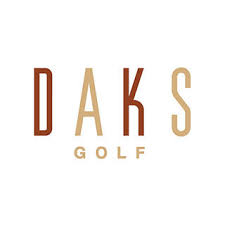

In [22]:
# 드라이브 소스코드 가져오기
html = browser.page_source
soup = bs(html, "html.parser")


# 이미지 대표 태그 찾아 tag_img 변수에 저장(tag_img => 리스트형 데이터)
tag_img = soup.find_all("div", class_="bRMDJf islir")

img=tag_img[0].find("img", class_="rg_i Q4LuWd")
if img.get("data-lazy-src") == None:
    print(img["src"])
else:
    print(img.get("data-lazy-src"))
    
